# 1. Evaluacion modelos de clasificacion binaria algoritmos de Machine Learning
***


### Caso de estudio #3


### Tecnicas de ajuste de los datos y modelos:

| Ingeniería de datos       | Si / No       |
| :-------                  | :------:    |
| Escalado de datos         | Si          |
| Ajuste de hiperparametros | No         |
| Sobremuestreo             | No          |
| Ajuste de pesos de clase  | No          |



In [1]:
# librerias
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
from scipy.io import loadmat
import pandas_profiling

from numpy.random import seed
seed(0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from plot_metric.functions import BinaryClassification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
from numpy import arange
from pprint import pprint
from sklearn.metrics import fbeta_score
from sklearn.model_selection import RandomizedSearchCV


In [2]:
# BINARIA funcion para generar matriz de confusion y medidas de desempeño del modelos clasificacion binarios
def model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
    print('\n')
    print("MATRIZ DE CONFUSION")
    print('\n')
    matriz = confusion_matrix(label_test, label_pred)
    #print(matriz)
    classes = ["Saludable","Falla Pista Interna"]
    cm = ConfusionMatrix(modelo, classes=classes, label_encoder={0:"Saludable", 1:"Falla Pista Interna"})
    cm.fit(data_train, label_train)
    cm.score(data_test, label_test)
    cm.show()
    # Medidas de desempeño del modelo
    print('\n')
    print("MEDIDAS DE DESEMPEÑO DEL MODELO")
    print('\n')
    print('Exactitud - Accuracy: {}'.format(modelo.score(data_test, label_test)))
    print('ROC AUC: {}'.format (metrics.roc_auc_score(label_test, label_pred)))
    print('-'*60)
    print('Precisión por clase: {}'.format(metrics.precision_score(label_test, label_pred, average=None)))
    print('Sensibilidad - Recall por clase: {}'.format(metrics.recall_score(label_test, label_pred, average=None)))
    print('F1 por clase: {}'.format(metrics.f1_score(label_test, label_pred, average=None)))
    print('-'*60)
    print('F1 Macro: {}'.format(metrics.f1_score(label_test, label_pred, average='macro')))
    print('F1 Micro: {}'.format(metrics.f1_score(label_test, label_pred, average='micro')))
    print('F1 Weighted: {}'.format(metrics.f1_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Sensibilidad - Recall Macro: {}'.format(metrics.recall_score(label_test, label_pred, average='macro')))
    print('Sensibilidad - Recall Micro: {}'.format(metrics.recall_score(label_test, label_pred, average='micro')))
    print('Sensibilidad - Recall Weighted: {}'.format(metrics.recall_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Precisión Macro: {}'.format(metrics.precision_score(label_test, label_pred, average='macro')))
    print('Precisión Micro: {}'.format(metrics.precision_score(label_test, label_pred, average='micro')))
    print('Precisión Weighted: {}'.format(metrics.precision_score(label_test, label_pred, average='weighted')))
    
    TP = matriz[1][1]
    TN = matriz[0][0]
    FP = matriz[0][1]
    FN = matriz[1][0]
    print('-'*60)
    print('Verdaderos positivos - True Positives:', TP)
    print('Verdaderos negativos - True Negatives:', TN)
    print('Falsos positivos - False Positives:', FP)
    print('Falsos negativos - False Negatives:', FN)
        # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
        # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
        # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
    conf_specificity = (TN / float(TN + FN))
        # calculate precision
    conf_precision = (TP / float(TP + FP))
        # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        # calculate FPR tasa de falsos positivos
    conf_FPR = 1 - conf_specificity
    print('-'*60)
    print(f'Error de clasificacion: {round(conf_misclassification,3)}') 
    print(f'Especificidad - Specificity: {round(conf_specificity,3)}') 
    print(f'Tasa de falsos positivos FPR: {round(conf_FPR,3)}')
    print('-'*60)
   
    print(classification_report(label_test, label_pred))
    # curva ROC clasificacion binaria
    bc = BinaryClassification(label_test, label_pred, labels=["Class 0", "Class 1"])
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    print('\n')
    print("CURVA ROC")
    plt.show()

## Datos rodamientos en estado saludable

In [3]:
# importar datos de archivo matlab
HA1 = loadmat (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\bases de datos vibraciones\rodamientos variando velocidad\datos de vibraciones\H-A-1.mat')

In [4]:
HA1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 09 15:18:50 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_1': array([[-0.00219944],
        [-0.0018706 ],
        [-0.00154175],
        ...,
        [ 0.00963905],
        [ 0.0093102 ],
        [ 0.00898136]]),
 'Channel_2': array([[4.18876708],
        [4.20060302],
        [4.20816487],
        ...,
        [0.03700339],
        [0.03634584],
        [4.14010822]])}

In [5]:
HA1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_1', 'Channel_2'])

In [6]:
HA11=pd.DataFrame(HA1['Channel_1'], columns = ['aceleracion'])
HA11.head()

,aceleracion
0,-0.002199
1,-0.001871
2,-0.001542
3,-0.001871
4,-0.002199


In [7]:
HA12=pd.DataFrame(HA1['Channel_2'], columns = ['velocidad'])
HA12.head()

,velocidad
0,4.188767
1,4.200603
2,4.208165
3,4.226576
4,4.240385


In [8]:
# concatenar los dos DF

H1train = pd.concat([HA11, HA12], axis=1, sort=False)
H1train.head()

,aceleracion,velocidad
0,-0.002199,4.188767
1,-0.001871,4.200603
2,-0.001542,4.208165
3,-0.001871,4.226576
4,-0.002199,4.240385


In [9]:
print("numero de dimensiones =", H1train.ndim)
print("tamaño de la tabla  =", H1train.shape)
print("total datos =", H1train.size)

numero de dimensiones = 2
tamaño de la tabla  = (2000000, 2)
total datos = 4000000


In [10]:
#hallar si hay nul o NaN
H1train.isnull().any()

aceleracion    False
velocidad      False
dtype: bool

In [11]:
H1train.isna().any()

aceleracion    False
velocidad      False
dtype: bool

In [12]:
H1train.isnull().sum()

aceleracion    0
velocidad      0
dtype: int64

## Etiquetado de datos

In [13]:
H1train.head()

,aceleracion,velocidad
0,-0.002199,4.188767
1,-0.001871,4.200603
2,-0.001542,4.208165
3,-0.001871,4.226576
4,-0.002199,4.240385


In [14]:
H1train['falla'] = 0
H1train.head()

,aceleracion,velocidad,falla
0,-0.002199,4.188767,0
1,-0.001871,4.200603,0
2,-0.001542,4.208165,0
3,-0.001871,4.226576,0
4,-0.002199,4.240385,0


In [15]:
H1train.insert(0, 'id', 1)
H1train.head()

,id,aceleracion,velocidad,falla
0,1,-0.002199,4.188767,0
1,1,-0.001871,4.200603,0
2,1,-0.001542,4.208165,0
3,1,-0.001871,4.226576,0
4,1,-0.002199,4.240385,0


In [16]:
# importar datos de archivo matlab
HA3 = loadmat (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\bases de datos vibraciones\rodamientos variando velocidad\datos de vibraciones\H-A-3.mat')

In [17]:
HA3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 09 15:21:21 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_1': array([[ 0.00174672],
        [ 0.00076018],
        [-0.00450137],
        ...,
        [ 0.02706795],
        [ 0.02969873],
        [ 0.02871218]]),
 'Channel_2': array([[0.03667461],
        [0.02812651],
        [0.03634584],
        ...,
        [4.27293377],
        [0.03700339],
        [0.03667461]])}

In [18]:
HA3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_1', 'Channel_2'])

In [19]:
HA31=pd.DataFrame(HA3['Channel_1'], columns = ['aceleracion'])
HA31.head()

,aceleracion
0,0.001747
1,0.000760
2,-0.004501
3,0.000102
4,0.002404


In [20]:
HA32=pd.DataFrame(HA3['Channel_2'], columns = ['velocidad'])
HA32.head()

,velocidad
0,0.036675
1,0.028127
2,0.036346
3,0.036346
4,0.036017


In [21]:
# concatenar los dos DF

H3train = pd.concat([HA31, HA32], axis=1, sort=False)
H3train.head()

,aceleracion,velocidad
0,0.001747,0.036675
1,0.000760,0.028127
2,-0.004501,0.036346
3,0.000102,0.036346
4,0.002404,0.036017


In [22]:
print("numero de dimensiones =", H3train.ndim)
print("tamaño de la tabla  =", H3train.shape)
print("total datos =", H3train.size)

numero de dimensiones = 2
tamaño de la tabla  = (2000000, 2)
total datos = 4000000


In [23]:
#hallar si hay nul o NaN
H3train.isnull().any()

aceleracion    False
velocidad      False
dtype: bool

In [24]:
H3train.isna().any()

aceleracion    False
velocidad      False
dtype: bool

In [25]:
H3train.isnull().sum()

aceleracion    0
velocidad      0
dtype: int64

## Etiquetado de datos

In [26]:
H3train.head()

,aceleracion,velocidad
0,0.001747,0.036675
1,0.000760,0.028127
2,-0.004501,0.036346
3,0.000102,0.036346
4,0.002404,0.036017


In [27]:
H3train['falla'] = 0
H3train.head()

,aceleracion,velocidad,falla
0,0.001747,0.036675,0
1,0.000760,0.028127,0
2,-0.004501,0.036346,0
3,0.000102,0.036346,0
4,0.002404,0.036017,0


In [28]:
H3train.insert(0, 'id', 1)
H3train.head()

,id,aceleracion,velocidad,falla
0,1,0.001747,0.036675,0
1,1,0.000760,0.028127,0
2,1,-0.004501,0.036346,0
3,1,0.000102,0.036346,0
4,1,0.002404,0.036017,0


## Datos rodamientos con falla en pista interna

In [29]:
# importar datos de archivo matlab
IA1 = loadmat (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\bases de datos vibraciones\rodamientos variando velocidad\datos de vibraciones\I-A-1.mat')

In [30]:
IA1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 09 17:52:06 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_1': array([[0.24871092],
        [0.24903977],
        [0.24838208],
        ...,
        [0.32927848],
        [0.26581098],
        [0.1648549 ]]),
 'Channel_2': array([[0.0379897 ],
        [0.03766093],
        [0.0379897 ],
        ...,
        [4.20684976],
        [4.22887776],
        [4.29200278]])}

In [31]:
IA1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_1', 'Channel_2'])

In [32]:
IA11=pd.DataFrame(IA1['Channel_1'], columns = ['aceleracion'])
IA11.head()

,aceleracion
0,0.248711
1,0.249040
2,0.248382
3,0.250355
4,0.251013


In [33]:
IA12=pd.DataFrame(IA1['Channel_2'], columns = ['velocidad'])
IA12.head()

,velocidad
0,0.037990
1,0.037661
2,0.037990
3,0.037661
4,0.037332


In [34]:
# concatenar los dos DF

I1train = pd.concat([IA11, IA12], axis=1, sort=False)
I1train.head()

,aceleracion,velocidad
0,0.248711,0.037990
1,0.249040,0.037661
2,0.248382,0.037990
3,0.250355,0.037661
4,0.251013,0.037332


In [35]:
print("numero de dimensiones =", I1train.ndim)
print("tamaño de la tabla  =", I1train.shape)
print("total datos =", I1train.size)

numero de dimensiones = 2
tamaño de la tabla  = (2000000, 2)
total datos = 4000000


In [36]:
#hallar si hay nul o NaN
I1train.isnull().any()

aceleracion    False
velocidad      False
dtype: bool

In [37]:
I1train.isna().any()

aceleracion    False
velocidad      False
dtype: bool

In [38]:
I1train.isnull().sum()

aceleracion    0
velocidad      0
dtype: int64

## Etiquetado de datos

In [39]:
I1train.head()

,aceleracion,velocidad
0,0.248711,0.037990
1,0.249040,0.037661
2,0.248382,0.037990
3,0.250355,0.037661
4,0.251013,0.037332


In [40]:
I1train['falla'] = 1
I1train.head()

,aceleracion,velocidad,falla
0,0.248711,0.037990,1
1,0.249040,0.037661,1
2,0.248382,0.037990,1
3,0.250355,0.037661,1
4,0.251013,0.037332,1


In [41]:
I1train.insert(0, 'id', 1)
I1train.head()

,id,aceleracion,velocidad,falla
0,1,0.248711,0.037990,1
1,1,0.249040,0.037661,1
2,1,0.248382,0.037990,1
3,1,0.250355,0.037661,1
4,1,0.251013,0.037332,1


In [42]:
# importar datos de archivo matlab
IA3 = loadmat (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\bases de datos vibraciones\rodamientos variando velocidad\datos de vibraciones\I-A-3.mat')

In [43]:
IA3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 09 17:52:19 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_1': array([[-0.01403794],
        [-0.007461  ],
        [-0.00252829],
        ...,
        [ 0.01818908],
        [-0.00088406],
        [ 0.00043133]]),
 'Channel_2': array([[0.03766093],
        [3.61998493],
        [4.17397216],
        ...,
        [4.25583741],
        [0.03733216],
        [0.03766093]])}

In [44]:
IA3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_1', 'Channel_2'])

In [45]:
IA31=pd.DataFrame(IA3['Channel_1'], columns = ['aceleracion'])
IA31.head()

,aceleracion
0,-0.014038
1,-0.007461
2,-0.002528
3,0.000431
4,-0.002199


In [46]:
IA32=pd.DataFrame(IA3['Channel_2'], columns = ['velocidad'])
IA32.head()

,velocidad
0,0.037661
1,3.619985
2,4.173972
3,4.198302
4,4.213425


In [47]:
# concatenar los dos DF

I3train = pd.concat([IA31, IA32], axis=1, sort=False)
I3train.head()

,aceleracion,velocidad
0,-0.014038,0.037661
1,-0.007461,3.619985
2,-0.002528,4.173972
3,0.000431,4.198302
4,-0.002199,4.213425


In [48]:
print("numero de dimensiones =", I3train.ndim)
print("tamaño de la tabla  =", I3train.shape)
print("total datos =", I3train.size)

numero de dimensiones = 2
tamaño de la tabla  = (2000000, 2)
total datos = 4000000


In [49]:
#hallar si hay nul o NaN
I3train.isnull().any()

aceleracion    False
velocidad      False
dtype: bool

In [50]:
I3train.isna().any()

aceleracion    False
velocidad      False
dtype: bool

In [51]:
I3train.isnull().sum()

aceleracion    0
velocidad      0
dtype: int64

## Etiquetado de datos

In [52]:
I3train.head()

,aceleracion,velocidad
0,-0.014038,0.037661
1,-0.007461,3.619985
2,-0.002528,4.173972
3,0.000431,4.198302
4,-0.002199,4.213425


In [53]:
I3train['falla'] = 1
I3train.head()

,aceleracion,velocidad,falla
0,-0.014038,0.037661,1
1,-0.007461,3.619985,1
2,-0.002528,4.173972,1
3,0.000431,4.198302,1
4,-0.002199,4.213425,1


In [54]:
I3train.insert(0, 'id', 1)
I3train.head()

,id,aceleracion,velocidad,falla
0,1,-0.014038,0.037661,1
1,1,-0.007461,3.619985,1
2,1,-0.002528,4.173972,1
3,1,0.000431,4.198302,1
4,1,-0.002199,4.213425,1


## Concatenar las bases entrenamiento

In [55]:
# concatenar
train=pd.concat([H1train, I3train], ignore_index=True)
train.head()

,id,aceleracion,velocidad,falla
0,1,-0.002199,4.188767,0
1,1,-0.001871,4.200603,0
2,1,-0.001542,4.208165,0
3,1,-0.001871,4.226576,0
4,1,-0.002199,4.240385,0


In [56]:
train.tail()

,id,aceleracion,velocidad,falla
3999995,1,0.081657,4.181863,1
3999996,1,0.053705,4.117094,1
3999997,1,0.018189,4.255837,1
3999998,1,-0.000884,0.037332,1
3999999,1,0.000431,0.037661,1


In [57]:
train.shape


(4000000, 4)

In [58]:
# normalizar datos
variables=['aceleracion','velocidad']

objetivo='falla'

### Normalizado de datos

In [59]:
# escalado de datos sin incluir id, y falla

scaler = MinMaxScaler()
train[variables]=scaler.fit_transform(train[variables])
train.head()

,id,aceleracion,velocidad,falla
0,1,0.484421,0.941317,0
1,1,0.484604,0.943925,0
2,1,0.484787,0.945591,0
3,1,0.484604,0.949648,0
4,1,0.484421,0.952691,0


In [60]:
train.tail()

,id,aceleracion,velocidad,falla
3999995,1,0.531158,0.939795,1
3999996,1,0.515579,0.925523,1
3999997,1,0.495784,0.956096,1
3999998,1,0.485154,0.026516,1
3999999,1,0.485887,0.026588,1


Tamaño de la base 4 millones de observaciones 

In [61]:
# borrar la columna id

train.drop('id', axis=1, inplace=True)
train.head()

,aceleracion,velocidad,falla
0,0.484421,0.941317,0
1,0.484604,0.943925,0
2,0.484787,0.945591,0
3,0.484604,0.949648,0
4,0.484421,0.952691,0


In [62]:
# separar datos de etiquetas

data_train=train.iloc[:,np.r_[0:2]]
label_train=train.iloc[:,2]

In [63]:
label_train.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

In [64]:
# conteo de observaciones etiquetadas con 1 y 0 en la base train
label_train.value_counts(sort=False)

0    2000000
1    2000000
Name: falla, dtype: int64

In [65]:
data_train.head()

,aceleracion,velocidad
0,0.484421,0.941317
1,0.484604,0.943925
2,0.484787,0.945591
3,0.484604,0.949648
4,0.484421,0.952691


In [66]:
label_train.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

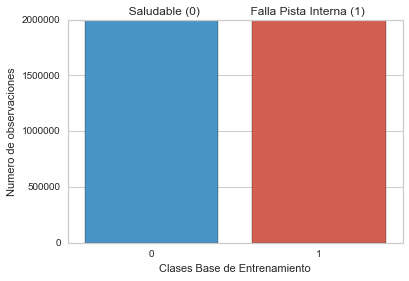

In [67]:
# grafica de clases base de train, estado base equilibrada
sns.countplot(label_train, palette=["#3498db", "#e74c3c"])
plt.title('       Saludable (0)               Falla Pista Interna (1)')
plt.xlabel("Clases Base de Entrenamiento")
plt.ylabel("Numero de observaciones")
plt.savefig('vibraciones entrenamientoapp.png')
pyplot.show()

## Concatenar las bases de prueba

In [68]:
# concatenar
test=pd.concat([H3train, I1train], ignore_index=True)
test.head()

,id,aceleracion,velocidad,falla
0,1,0.001747,0.036675,0
1,1,0.000760,0.028127,0
2,1,-0.004501,0.036346,0
3,1,0.000102,0.036346,0
4,1,0.002404,0.036017,0


In [69]:
test.tail()

,id,aceleracion,velocidad,falla
3999995,1,0.408531,0.037332,1
3999996,1,0.371371,4.076983,1
3999997,1,0.329278,4.206850,1
3999998,1,0.265811,4.228878,1
3999999,1,0.164855,4.292003,1


In [70]:
test.shape


(4000000, 4)

In [71]:
# normalizado de datos 

test[variables]=scaler.transform(test[variables])

Tamaño de la base 4 millones de observaciones 

In [72]:
# borrar la columna id

test.drop('id', axis=1, inplace=True)
test.head()

,aceleracion,velocidad,falla
0,0.486620,0.026371,0
1,0.486070,0.024487,0
2,0.483138,0.026299,0
3,0.485704,0.026299,0
4,0.486987,0.026226,0


In [73]:
# separar datos de etiquetas

data_test=test.iloc[:,np.r_[0:2]]
label_test=test.iloc[:,2]

In [74]:
label_test.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

In [75]:
# conteo de observaciones etiquetadas con 1 y 0 en la base train
label_test.value_counts(sort=False)

0    2000000
1    2000000
Name: falla, dtype: int64

In [76]:
data_test.head()

,aceleracion,velocidad
0,0.486620,0.026371
1,0.486070,0.024487
2,0.483138,0.026299
3,0.485704,0.026299
4,0.486987,0.026226


In [77]:
label_test.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

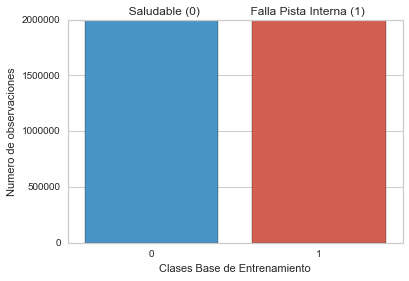

In [78]:
# grafica de clases base de train, estado base equilibrada
sns.countplot(label_test, palette=["#3498db", "#e74c3c"])
plt.title('       Saludable (0)               Falla Pista Interna (1)')
plt.xlabel("Clases Base de Entrenamiento")
plt.ylabel("Numero de observaciones")
plt.savefig('vibraciones entrenamientoapp.png')
pyplot.show()

# Modelos de ML clasificacion binaria variables normalizadas hiperparametros por defecto

## Modelo Random Forest 

In [79]:
modelo1=RandomForestClassifier(random_state=0, n_estimators=10)
modelo1.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
label_pred1 = modelo1.predict(data_test)

In [81]:
# para evaluar cuales caracteristicas tiene mayor peso en el modelo
fi=modelo1.feature_importances_
fi

array([0.63435665, 0.36564335])

#### Evaluacion del modelo



MATRIZ DE CONFUSION




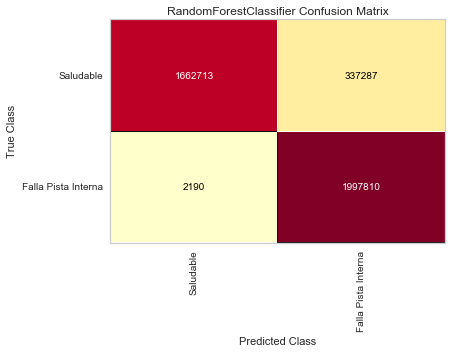



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.91513075
ROC AUC: 0.9151307500000001
------------------------------------------------------------
Precisión por clase: [0.99868461 0.85555761]
Sensibilidad - Recall por clase: [0.8313565 0.998905 ]
F1 por clase: [0.90737081 0.92169103]
------------------------------------------------------------
F1 Macro: 0.9145309172971128
F1 Micro: 0.91513075
F1 Weighted: 0.9145309172971129
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9151307500000001
Sensibilidad - Recall Micro: 0.91513075
Sensibilidad - Recall Weighted: 0.91513075
------------------------------------------------------------
Precisión Macro: 0.9271211072193069
Precisión Micro: 0.91513075
Precisión Weighted: 0.9271211072193069
------------------------------------------------------------
Verdaderos positivos - True Positives: 1997810
Verdaderos negativos - True Negatives: 1662713
Falsos positivos - False Positives: 337287
Falsos 

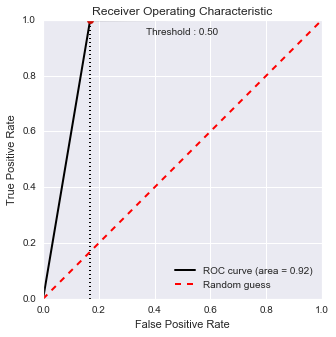

In [82]:
# metricas de desempeño
model_evaluation(data_train, label_train, data_test, label_test, modelo1, label_pred1)

## k-NN KNeighborsClassifier 

In [85]:
modelo5= KNeighborsClassifier()
modelo5.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
label_pred5 = modelo5.predict(data_test)

In [87]:
label_pred=label_pred5

In [88]:
# # metricas de desempeño
matriz = confusion_matrix(label_test, label_pred)
print('Confusion Matrix: \n',confusion_matrix(label_test,label_pred))
print('\n')
print("MEDIDAS DE DESEMPEÑO DEL MODELO")
print('\n')
print('Exactitud - Accuracy: {}'.format(accuracy_score(label_test,label_pred)))

print('-'*60)
print('Precisión por clase: {}'.format(metrics.precision_score(label_test, label_pred, average=None)))
print('Sensibilidad - Recall por clase: {}'.format(metrics.recall_score(label_test, label_pred, average=None)))
print('F1 por clase: {}'.format(metrics.f1_score(label_test, label_pred, average=None)))
print('-'*60)
print('F1 Macro: {}'.format(metrics.f1_score(label_test, label_pred, average='macro')))
print('F1 Micro: {}'.format(metrics.f1_score(label_test, label_pred, average='micro')))
print('F1 Weighted: {}'.format(metrics.f1_score(label_test, label_pred, average='weighted')))
print('-'*60)
print('Sensibilidad - Recall Macro: {}'.format(metrics.recall_score(label_test, label_pred, average='macro')))
print('Sensibilidad - Recall Micro: {}'.format(metrics.recall_score(label_test, label_pred, average='micro')))
print('Sensibilidad - Recall Weighted: {}'.format(metrics.recall_score(label_test, label_pred, average='weighted')))
print('-'*60)
print('Precisión Macro: {}'.format(metrics.precision_score(label_test, label_pred, average='macro')))
print('Precisión Micro: {}'.format(metrics.precision_score(label_test, label_pred, average='micro')))
print('Precisión Weighted: {}'.format(metrics.precision_score(label_test, label_pred, average='weighted')))

Confusion Matrix: 
 [[1615004  384996]
 [   2226 1997774]]


MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9031945
------------------------------------------------------------
Precisión por clase: [0.99862357 0.83842503]
Sensibilidad - Recall por clase: [0.807502 0.998887]
F1 por clase: [0.89295068 0.91164903]
------------------------------------------------------------
F1 Macro: 0.9022998544369254
F1 Micro: 0.9031945
F1 Weighted: 0.9022998544369254
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9031945
Sensibilidad - Recall Micro: 0.9031945
Sensibilidad - Recall Weighted: 0.9031945
------------------------------------------------------------
Precisión Macro: 0.9185242993697815
Precisión Micro: 0.9031945
Precisión Weighted: 0.9185242993697815


In [89]:
print('ROC AUC: {}'.format (metrics.roc_auc_score(label_test, label_pred)))

ROC AUC: 0.9031944999999999


              precision    recall  f1-score   support

           0       1.00      0.81      0.89   2000000
           1       0.84      1.00      0.91   2000000

    accuracy                           0.90   4000000
   macro avg       0.92      0.90      0.90   4000000
weighted avg       0.92      0.90      0.90   4000000



CURVA ROC


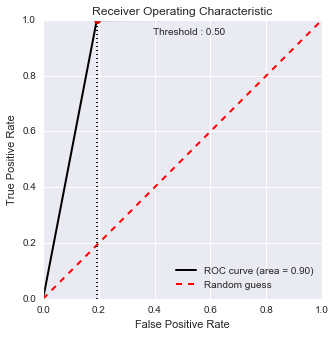

In [90]:
print(classification_report(label_test, label_pred))
# curva ROC clasificacion binaria
bc = BinaryClassification(label_test, label_pred, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
print('\n')
print("CURVA ROC")
plt.show()

## Decision tree

In [91]:
modelo6= tree.DecisionTreeClassifier()
modelo6.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
label_pred6 = modelo6.predict(data_test)



MATRIZ DE CONFUSION




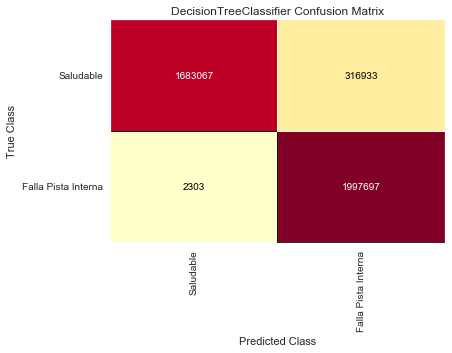



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.920191
ROC AUC: 0.920191
------------------------------------------------------------
Precisión por clase: [0.99863353 0.86307401]
Sensibilidad - Recall por clase: [0.8415335 0.9988485]
F1 por clase: [0.91337749 0.92601081]
------------------------------------------------------------
F1 Macro: 0.9196941475054107
F1 Micro: 0.9201910000000001
F1 Weighted: 0.9196941475054107
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.920191
Sensibilidad - Recall Micro: 0.920191
Sensibilidad - Recall Weighted: 0.920191
------------------------------------------------------------
Precisión Macro: 0.9308537731526068
Precisión Micro: 0.920191
Precisión Weighted: 0.9308537731526068
------------------------------------------------------------
Verdaderos positivos - True Positives: 1997697
Verdaderos negativos - True Negatives: 1683067
Falsos positivos - False Positives: 316933
Falsos negativos - False Ne

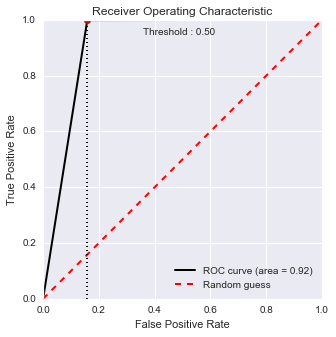

In [93]:
# Metricas de desempeño:
model_evaluation(data_train, label_train, data_test, label_test, modelo6, label_pred6)

## Logistic Regression

In [94]:
modelo7= LogisticRegression()
modelo7.fit(data_train, label_train)

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
label_pred7 = modelo7.predict(data_test)



MATRIZ DE CONFUSION




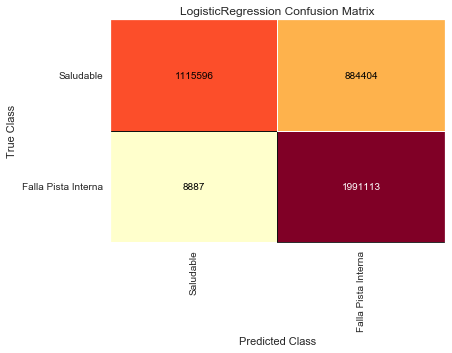



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.77667725
ROC AUC: 0.7766772499999999
------------------------------------------------------------
Precisión por clase: [0.99209681 0.69243653]
Sensibilidad - Recall por clase: [0.557798  0.9955565]
F1 por clase: [0.71409958 0.81678025]
------------------------------------------------------------
F1 Macro: 0.7654399159183488
F1 Micro: 0.77667725
F1 Weighted: 0.7654399159183488
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.77667725
Sensibilidad - Recall Micro: 0.77667725
Sensibilidad - Recall Weighted: 0.77667725
------------------------------------------------------------
Precisión Macro: 0.8422666689090816
Precisión Micro: 0.77667725
Precisión Weighted: 0.8422666689090818
------------------------------------------------------------
Verdaderos positivos - True Positives: 1991113
Verdaderos negativos - True Negatives: 1115596
Falsos positivos - False Positives: 884404
Falsos negativo

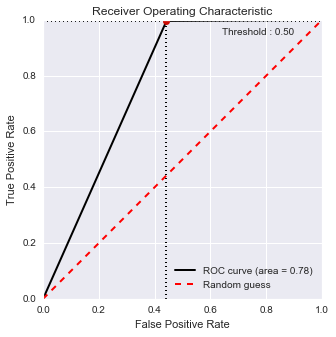

In [96]:
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, modelo7, label_pred7)

## Bagging Classifier

In [97]:
modelo8= BaggingClassifier()
modelo8.fit(data_train, label_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)



MATRIZ DE CONFUSION




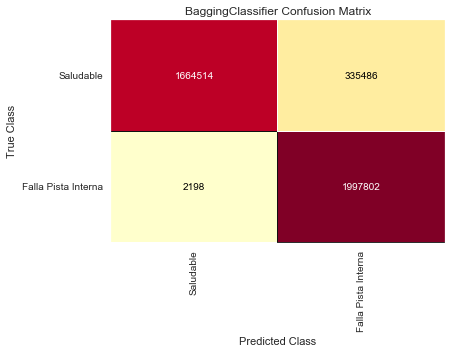



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.915579
ROC AUC: 0.915579
------------------------------------------------------------
Precisión por clase: [0.99868124 0.85621749]
Sensibilidad - Recall por clase: [0.832257 0.998901]
F1 por clase: [0.9079055  0.92207211]
------------------------------------------------------------
F1 Macro: 0.9149888050452635
F1 Micro: 0.915579
F1 Weighted: 0.9149888050452634
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.915579
Sensibilidad - Recall Micro: 0.915579
Sensibilidad - Recall Weighted: 0.915579
------------------------------------------------------------
Precisión Macro: 0.9274493640479737
Precisión Micro: 0.915579
Precisión Weighted: 0.9274493640479737
------------------------------------------------------------
Verdaderos positivos - True Positives: 1997802
Verdaderos negativos - True Negatives: 1664514
Falsos positivos - False Positives: 335486
Falsos negativos - False Negatives: 219

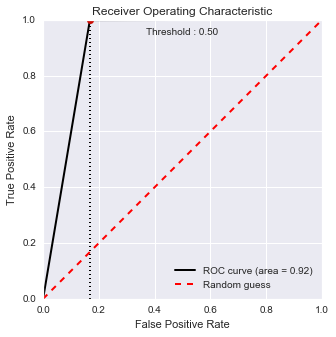

In [98]:
label_pred8 = modelo8.predict(data_test)
# metricas de desempeño
model_evaluation(data_train, label_train, data_test, label_test, modelo8, label_pred8)

## Extra Trees Classifier

In [99]:
modelo9=ExtraTreesClassifier()
modelo9.fit(data_train, label_train)

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)



MATRIZ DE CONFUSION




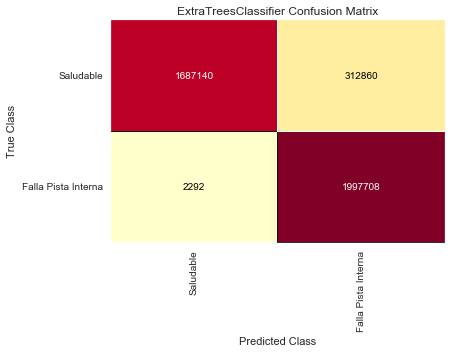



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.921212
ROC AUC: 0.921212
------------------------------------------------------------
Precisión por clase: [0.99864333 0.86459606]
Sensibilidad - Recall por clase: [0.84357  0.998854]
F1 por clase: [0.91457981 0.92688852]
------------------------------------------------------------
F1 Macro: 0.9207341633291141
F1 Micro: 0.921212
F1 Weighted: 0.920734163329114
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.921212
Sensibilidad - Recall Micro: 0.921212
Sensibilidad - Recall Weighted: 0.921212
------------------------------------------------------------
Precisión Macro: 0.9316196978518069
Precisión Micro: 0.921212
Precisión Weighted: 0.9316196978518069
------------------------------------------------------------
Verdaderos positivos - True Positives: 1997708
Verdaderos negativos - True Negatives: 1687140
Falsos positivos - False Positives: 312860
Falsos negativos - False Negatives: 2292

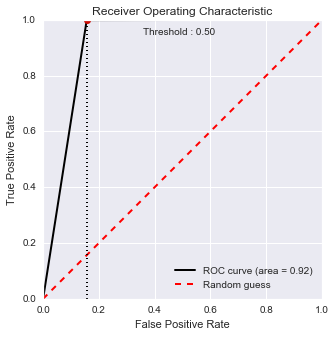

In [100]:
label_pred9 = modelo9.predict(data_test)
# metricas de desempeño
model_evaluation(data_train, label_train, data_test, label_test, modelo9, label_pred9)

## Gradient Boosting Classifier

In [101]:
modelo10=GradientBoostingClassifier()
modelo10.fit(data_train, label_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)



MATRIZ DE CONFUSION




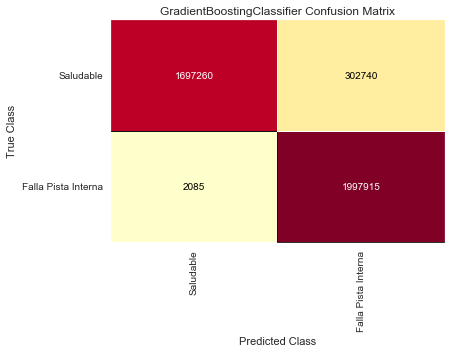



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.92379375
ROC AUC: 0.92379375
------------------------------------------------------------
Precisión por clase: [0.99877306 0.86841139]
Sensibilidad - Recall por clase: [0.84863   0.9989575]
F1 por clase: [0.91760028 0.92912126]
------------------------------------------------------------
F1 Macro: 0.9233607698241606
F1 Micro: 0.92379375
F1 Weighted: 0.9233607698241605
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.92379375
Sensibilidad - Recall Micro: 0.92379375
Sensibilidad - Recall Weighted: 0.92379375
------------------------------------------------------------
Precisión Macro: 0.9335922219348142
Precisión Micro: 0.92379375
Precisión Weighted: 0.9335922219348142
------------------------------------------------------------
Verdaderos positivos - True Positives: 1997915
Verdaderos negativos - True Negatives: 1697260
Falsos positivos - False Positives: 302740
Falsos negativos - Fals

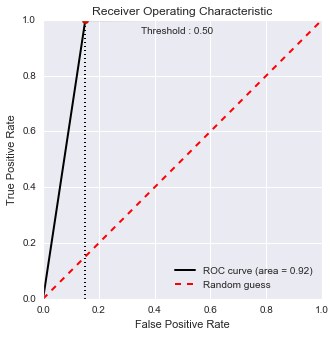

In [102]:
label_pred10 = modelo10.predict(data_test)
# metricas de desempeño
model_evaluation(data_train, label_train, data_test, label_test, modelo10, label_pred10)

Los algoritmos de conjunto de ML Gradient Boosting arroja un un resultado en terminos de F1- macro del 92%.